In [69]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# EPFL Machine Learning Higgs

TODO description

## 1. Load the training data into feature matrix, class labels, and event ids:

In [84]:
from proj1_helpers import *
from implementations import *
from cross_validation import *
from plots import *

In [140]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## 2. Data pre-processing

Before any attempt to prediction, we perform some data cleaning (TODO) and preprocessing. We start by standardising our training dataset.

In [182]:
mass_abs(tX)
tx = standardise(tX)
tx_phi = np.delete(tx, [15, 18, 20], axis = 1) 
tx_phi = np.c_[np.ones(len(tx[:,0])), tx_phi]
tx = np.c_[np.ones(len(tx[:,0])), tx]
# add constant term
nb_features=tx_phi.shape[1]
tx_phi

array([[ 1.        , -0.55307334,  0.06833197, ...,  1.5668    ,
         1.55858439,  0.4125105 ],
       [ 1.        , -0.37413543,  0.55250482, ..., -0.63936657,
        -0.63936694, -0.27381996],
       [ 1.        , -0.19618844,  3.19515553, ..., -0.63936657,
        -0.63936694, -0.29396985],
       ...,
       [ 1.        , -0.50470507,  0.31931645, ..., -0.63936657,
        -0.63936694, -0.31701723],
       [ 1.        , -0.42103027, -0.84532397, ..., -0.63936657,
        -0.63936694, -0.74543941],
       [ 1.        ,  2.31835956,  0.66533608, ..., -0.63936657,
        -0.63936694, -0.74543941]])

In [92]:
w, loss = least_squares(y, tX)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, tX)))
      
w, loss = least_squares(y, tx)
print('Acc pour standardisé:  {} '.format(compute_accuracy(w, y, tx)))

Acc pour non standardisé:  0.743824 
Acc pour standardisé:  0.802576 


In [13]:
w, loss = reg_logistic_regression(y, tx, lambda_=1, initial_w=np.random.rand(31), max_iters=50, gamma=0.1)

C:\Users\Quent\Desktop\epfl\MA1\ML2020_PR1\proj1_helpers.py:117: RuntimeWarning: overflow encountered in exp
  ret = 1 / (1 + np.exp(-t))


## 3. Classic ML methods

The following predictions are made using the functions implemented during the course labs.

### 3.1 Least Squares GD

In [14]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.1

cross_validation(y, tx, compute_accuracy, 'least_squares_GD', k_fold=4, **kwargs)

(0.3840927936742401, 0.38346733881877104, 0.719792, 0.7197399999999999)

### 3.2 Least Squares SGD

In [15]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.001

cross_validation(y, tx, compute_accuracy, 'least_squares_SGD', k_fold=4, **kwargs)

(0.4866065983808383,
 0.48606778272726825,
 0.6609613333333333,
 0.6613680000000001)

### 3.3 Least Squares, normal equations

In [185]:
#### testing answer

cross_validation(y, tx, compute_accuracy, 'least_squares', k_fold=4)

(0.3361888547754073,
 0.33634642364426875,
 0.7509053333333333,
 0.7505959999999999)

### 3.4 Ridge Regression

#### 3.4.1 Algorithm

In [151]:
# Method parameters
kwargs = {}
kwargs['lambda_'] = 0.00011

cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, degree = 2, **kwargs)

(0.29629194875902504, 0.3369990346274388, 0.799088, 0.79906)

#### 3.4.2 Hyperparameter search: lambda

In order to improve our performance, we run an hyperparameter search on the regularisation parameter lambda.

1e-06

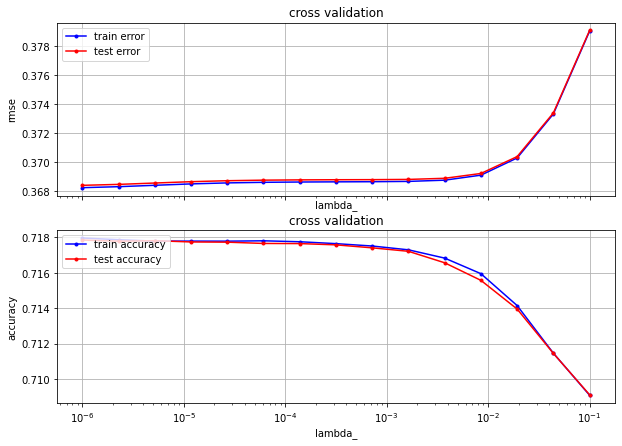

In [125]:
lambda_space = np.logspace(-6, -1, 15)
best_lambda = cross_validation_hyper_search(y, tx, 'lambda_', lambda_space , compute_accuracy, 'ridge_regression', 4, **kwargs)
best_lambda # TODO il essaie clairement de mettre lambda à 0

#### 3.4.3 Hyperparameter search : degree

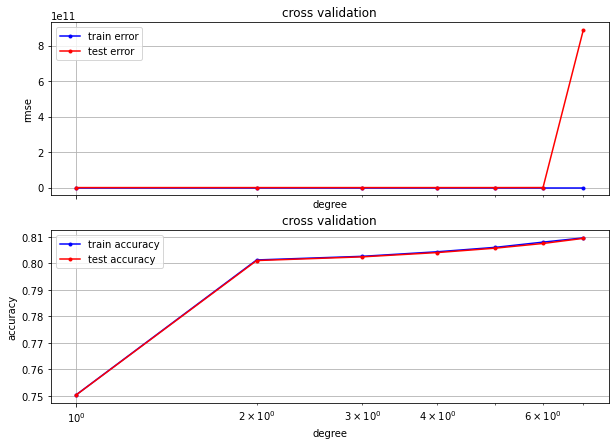

In [189]:
kwargs = {}
kwargs['lambda_'] = 0.00011

degree_max = 7
search_space = range(1, degree_max + 1)
loss_tr = []
loss_te = []
acc_tr = []
acc_te = []

for i in search_space :
    l_tr, l_te, a_tr, a_te = cross_validation(y, tx_phi, compute_accuracy, 'ridge_regression', k_fold=4, degree = i, **kwargs)
    loss_tr.append(l_tr)
    loss_te.append(l_te)
    acc_tr.append(a_tr)
    acc_te.append(a_te)
    
fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True, sharey=False)
cross_validation_visualization_loss(search_space, loss_tr, loss_te, 'degree', axes[0])
cross_validation_visualization_metric(search_space, acc_tr, acc_te, 'degree', 'accuracy', axes[1])

In [159]:
lambda_ = 0.00011
poly = build_poly(tx, 3)
poly = np.c_[np.ones(len(poly[:,0])), poly]
w, loss = ridge_regression(y, poly, lambda_)
w.shape

(91,)

### 3.5 Logistic Regression

In [44]:
y_log_reg = (y+1)/2
w, loss = logistic_regression(y_log_reg, tx, np.zeros(nb_features), 1000, 0.0001)
compute_accuracy_log_reg(w, y_log_reg, tx)

Current iteration=0, loss=173286.79513998624
Current iteration=100, loss=458448.90034008765
Current iteration=200, loss=350182.44580717006
Current iteration=300, loss=1739912.3808360258
Current iteration=400, loss=1214708.4361418542
Current iteration=500, loss=1170504.1695809157
Current iteration=600, loss=1148485.5947754313
Current iteration=700, loss=1131327.1948510795
Current iteration=800, loss=1116727.943917157
Current iteration=900, loss=1104035.1369920387


0.710632

In [94]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 1001
kwargs['gamma'] = 0.00001

cross_validation(y_log_reg, tx, compute_accuracy_log_reg, 'logistic_regression', k_fold=4, **kwargs)

Current iteration=0, loss=0.6931471805599453
Current iteration=100, loss=0.6290366984070628
Current iteration=200, loss=0.6166129028690555
Current iteration=300, loss=0.609859713455247
Current iteration=400, loss=0.6048446919081252
Current iteration=500, loss=0.6006955615550001
Current iteration=600, loss=0.5971396475854284
Current iteration=700, loss=0.5940475347180398
Current iteration=800, loss=0.5913357523323521
Current iteration=900, loss=0.5889421881476126
Current iteration=1000, loss=0.5868178792306471
Current iteration=0, loss=0.6931471805599453
Current iteration=100, loss=0.6281768243737099
Current iteration=200, loss=0.6157393624628538
Current iteration=300, loss=0.6089602968645902
Current iteration=400, loss=0.6039162941746207
Current iteration=500, loss=0.5997373188294972
Current iteration=600, loss=0.5961521113346672
Current iteration=700, loss=0.5930321786107898
Current iteration=800, loss=0.5902945349639491
Current iteration=900, loss=0.5878772521930494
Current iteration

(0.5860887762996976, 0.5861019922160302, 0.6830013333333333, 0.68296)

### 3.6 Penalized Logistic Regression

#### 3.6.1 Algorithm

In [173]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features * 2 - 1)
kwargs['max_iters'] = 500
kwargs['gamma'] = 0.001
kwargs['lambda_'] = 0.01
kwargs['norm'] = 'l1'

y_log_reg = (y+1)/2

cross_validation(y_log_reg, tx, compute_accuracy_log_reg, 'reg_logistic_regression', k_fold=4, degree = 2, **kwargs)

C:\Users\Quent\Desktop\epfl\MA1\ML2020_PR1\proj1_helpers.py:167: RuntimeWarning: overflow encountered in exp
  return np.clip(ret, 10**(-10), 1 - 10**(-10))


(33.803057455746405, 7.012036712531228, 0.6892133333333335, 0.6891879999999999)

In [171]:
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['norm'] = 'l2'

cross_validation(y_log_reg, tx, compute_accuracy_log_reg, 'reg_logistic_regression', k_fold=4, **kwargs)

(10.25285555006258, 7.362796225974467, 0.65882, 0.658888)

#### 3.6.2 Hyperparameter search: lambda

In order to improve our performance, we run an hyperparameter search on the regularisation parameter lambda.

In [ ]:
poly_tx = build_poly(tx_phi, 2)

kwargs['initial_w'] = np.zeros(nb_features * 2 - 1)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.000001
kwargs['norm'] = 'l2'
lambda_space = np.logspace(-5, -1.1, 15)
best_lambda = cross_validation_hyper_search(y_log_reg, poly_tx, 'lambda_', lambda_space , compute_accuracy_log_reg, 'reg_logistic_regression', 4, **kwargs)
best_lambda 

C:\Users\Quent\Desktop\epfl\MA1\ML2020_PR1\proj1_helpers.py:128: RuntimeWarning: overflow encountered in exp
  for i in range(tx.shape[1]) :


1.584893192461114e-06

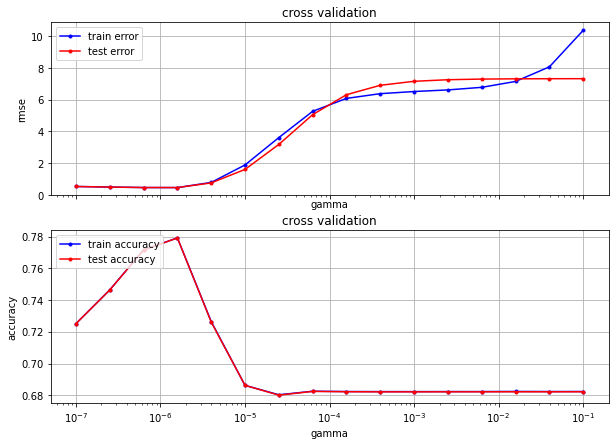

In [198]:
kwargs['initial_w'] = np.zeros(nb_features * 2 - 1)
kwargs['max_iters'] = 50
kwargs['lambda'] = best_lambda
gamma_space = np.logspace(-7, -1, 16)
best_gamma = cross_validation_hyper_search(y_log_reg, poly_tx, 'gamma', gamma_space , compute_accuracy_log_reg, 'reg_logistic_regression', 4, **kwargs)
best_gamma

## Generate predictions and save ouput in csv format for submission:

In [155]:
DATA_TEST_PATH = 'data/test.csv'

# TODO standardise test data when required
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [160]:
mass_abs(tX_test)
tx_test = standardise(tX_test)
tx_test_poly = build_poly(tx_test, 3)
tx_test_poly = np.c_[np.ones(len(tx_test_poly[:,0])), tx_test_poly]
tx_test_poly.shape

(568238, 91)

In [161]:
OUTPUT_PATH = 'data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tx_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [61]:
compute_accuracy(w, y, tx)

0.74178